In [ ]:
!pip install ultralytics

In [ ]:
#Verifying data_path and data.yaml file
!ls /content/drive/MyDrive/Split_dataset

images	labels


In [ ]:
from ultralytics import YOLO

# 1. Training The Model

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # nano model for quick training

EPOCHS=500
BATCH_SIZE=16

# Train on your dataset
model.train(
    data="/content/drive/MyDrive/data.yaml",  # path to data.yaml
    epochs=EPOCHS,            # number of epochs
    imgsz=640,            # image size
    batch=BATCH_SIZE,             # batch size
    project="/content/drive/MyDrive/Training_results/runs_500_EPOCHS",  # save results in Drive
    name="yolov8_train"   # folder name
)

In [ ]:
testing_dict={'Epochs_for_training':[],
              'MeanPrecision':[],
              'MeanRecall':[],
              'mAP50':[],
              'mAP50-95':[]}

# 2. Testing the Model
* Selecting the best model that is previously stored and testing on test_data

In [ ]:
epochs=500
model = YOLO(f"/content/drive/MyDrive/Training_results/runs_{epochs}_EPOCHS/yolov8_train/weights/best.pt")

# Evaluate on test set
metrics = model.val(
    data="/content/drive/MyDrive/data.yaml",
    imgsz=640,
    batch=16,
    split="test",
    device=0,
    workers=1
)


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 55.6±17.8 MB/s, size: 107.7 KB)
val: Scanning /content/drive/MyDrive/Split_dataset/labels/test.cache... 51 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 102594.5it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.6it/s 2.5s
                   all         51       1485      0.926      0.905       0.95      0.642
                    11         50         50      0.932        0.9      0.964      0.663
                    12         48         49      0.928      0.878      0.962      0.615
                    13         49         49       0.86      0.877      0.859      0.575
                    14         50         50      0.916      0.871      0.888      0.565
                    15         48 

In [ ]:
mp="Precision:", metrics.box.mp      # mean precision
mr="Recall:", metrics.box.mr         # mean recall
map50="mAP@50:", metrics.box.map50
map5095="mAP@50-95:", metrics.box.map

testing_dict['Epochs_for_training'].append(epochs)
testing_dict['MeanPrecision'].append(mp)
testing_dict['MeanRecall'].append(mr)
testing_dict['mAP50'].append(map50)
testing_dict['mAP50-95'].append(map5095)

In [ ]:
print(testing_dict)

{'Epochs_for_training': [5, 20, 50, 100, 200, 500], 'MeanPrecision': [('Precision:', np.float64(0.09732455594579117)), ('Precision:', np.float64(0.3748626201411026)), ('Precision:', np.float64(0.477321812607465)), ('Precision:', np.float64(0.7916813874572937)), ('Precision:', np.float64(0.8677175703006956)), ('Precision:', np.float64(0.9261822753352441))], 'MeanRecall': [('Recall:', np.float64(0.6930348234242536)), ('Recall:', np.float64(0.6944583657929562)), ('Recall:', np.float64(0.8789463242569049)), ('Recall:', np.float64(0.8431797110015931)), ('Recall:', np.float64(0.8900943837743706)), ('Recall:', np.float64(0.9051559687410116))], 'mAP50': [('mAP@50:', np.float64(0.1458646898356335)), ('mAP@50:', np.float64(0.45424357125861575)), ('mAP@50:', np.float64(0.5495344519292694)), ('mAP@50:', np.float64(0.8835417363784319)), ('mAP@50:', np.float64(0.9206155242904961)), ('mAP@50:', np.float64(0.9500022243764429))], 'mAP50-95': [('mAP@50-95:', np.float64(0.09191368210935097)), ('mAP@50-95

In [ ]:
import pandas as pd
df=pd.DataFrame(testing_dict)

In [ ]:
df

,Epochs_for_training,MeanPrecision,MeanRecall,mAP50,mAP50-95
0,5,"(Precision:, 0.09732455594579117)","(Recall:, 0.6930348234242536)","(mAP@50:, 0.1458646898356335)","(mAP@50-95:, 0.09191368210935097)"
1,20,"(Precision:, 0.3748626201411026)","(Recall:, 0.6944583657929562)","(mAP@50:, 0.45424357125861575)","(mAP@50-95:, 0.29306657319559914)"
2,50,"(Precision:, 0.477321812607465)","(Recall:, 0.8789463242569049)","(mAP@50:, 0.5495344519292694)","(mAP@50-95:, 0.35635676251306825)"
3,100,"(Precision:, 0.7916813874572937)","(Recall:, 0.8431797110015931)","(mAP@50:, 0.8835417363784319)","(mAP@50-95:, 0.5676297042270685)"
4,200,"(Precision:, 0.8677175703006956)","(Recall:, 0.8900943837743706)","(mAP@50:, 0.9206155242904961)","(mAP@50-95:, 0.6148626275444249)"
5,500,"(Precision:, 0.9261822753352441)","(Recall:, 0.9051559687410116)","(mAP@50:, 0.9500022243764429)","(mAP@50-95:, 0.6419598215015483)"


In [ ]:
model = YOLO("/content/drive/MyDrive/Training_results/runs_500_EPOCHS/yolov8_train/weights/best.pt")

# Evaluate on test set
metrics = model.val(
    data="/content/drive/MyDrive/data.yaml",
    split="test",
    save=True,
    project="/content/drive/MyDrive/Testing_results/runs_2",  # custom folder
    name="metrics"  # subfolder name
)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.4 ms, read: 28.8±11.8 MB/s, size: 94.2 KB)
val: Scanning /content/drive/MyDrive/Split_dataset/labels/test.cache... 51 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 19492.4it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.20it/s 19.6s
                   all         51       1485      0.926      0.905       0.95      0.642
                    11         50         50      0.932        0.9      0.964      0.663
                    12         48         49      0.928      0.878      0.962      0.615
                    13         49         49       0.86      0.877      0.859      0.575
                    14         50         50      0.916      0.871      0.888      0.565
                    15         48    

## 2.2 Optional Analysis
* Each class metrics are observed
* Confusion matrix for each class is plotted and observed

In [ ]:
class_map = model.names

# build dataframe row by row
rows = []
for i in range(len(class_map)):
    rows.append({
        "Class": class_map[i],
        "Precision": float(metrics.box.p[i]),
        "Recall": float(metrics.box.r[i]),
        "AP50": float(metrics.box.ap50[i]),
        "AP": float(metrics.box.ap[i])   # AP averaged over IoU=0.5:0.95
    })

# create dataframe
class_metrics_df = pd.DataFrame(rows)
class_metrics_df.to_csv(path_or_buf="/content/drive/MyDrive/Testing_results/runs_2/metrics/class_metrics.csv",index=False)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Run your eval (you already have this)
# metrics = model.val(..., save=True, project=".../Testing_results/runs_2", name="metrics")

# 2) Grab the raw confusion matrix and class names
cm = metrics.confusion_matrix.matrix.copy()   # shape [C, C], counts
class_map = model.names                       # dict: {0: 'class0', 1: 'class1', ...}
classes = [class_map[i] for i in range(len(class_map))]

# 3) Prepare output folders
base_out = "/content/drive/MyDrive/Testing_results/runs_2/metrics"
ovr_dir = os.path.join(base_out, "one_vs_all")
os.makedirs(ovr_dir, exist_ok=True)

# 4) Compute per-class 2x2 matrices + metrics
S = cm.sum()
rows = []
for k, name in enumerate(classes):
    tp = int(cm[k, k])
    fn = int(cm[k, :].sum() - cm[k, k])
    fp = int(cm[:, k].sum() - cm[k, k])
    tn = int(S - tp - fn - fp)

    prec = tp / (tp + fp) if (tp + fp) > 0 else float("nan")
    rec  = tp / (tp + fn) if (tp + fn) > 0 else float("nan")
    f1   = (2*prec*rec) / (prec + rec) if (prec + rec) > 0 else float("nan")

    rows.append({
        "class_id": k,
        "class_name": name,
        "TP": tp, "FP": fp, "FN": fn, "TN": tn,
        "precision": prec, "recall": rec, "f1": f1
    })

    # Save a 2x2 image for this class
    m2 = np.array([[tn, fp],
                   [fn, tp]])
    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    im = ax.imshow(m2)
    ax.set_yticks([0,1]); ax.set_yticklabels([f"Pred≠{k}", f"Pred={k}"])
    ax.set_xticks([0,1]); ax.set_xticklabels([f"GT≠{k}", f"GT={k}"])
    for i in range(2):
        for j in range(2):
            ax.text(j, i, int(m2[i, j]), ha="center", va="center")
    ax.set_title(f"One-vs-All CM: {k} ({name})")
    fig.tight_layout()
    fig.savefig(os.path.join(ovr_dir, f"class_{k}_{name}_cm.png"), dpi=200)
    plt.close(fig)

# 5) Save the per-class summary table
df = pd.DataFrame(rows)
df.to_csv(os.path.join(ovr_dir, "one_vs_all_summary.csv"), index=False)
print(df.head())


   class_id class_name  TP  FP  FN    TN  precision    recall        f1
0         0         11  48   2   6  1571   0.960000  0.888889  0.923077
1         1         12  45   4   8  1570   0.918367  0.849057  0.882353
2         2         13  47   2   5  1573   0.959184  0.903846  0.930693
3         3         14  48   2   5  1572   0.960000  0.905660  0.932039
4         4         15  43   5   7  1572   0.895833  0.860000  0.877551


## 2.3 Plot Sample Images

In [ ]:
# Load trained model
model = YOLO("/content/drive/MyDrive/Training_results/runs_500_EPOCHS/yolov8_train/weights/best.pt")

# Paths
test_images_path = "/content/drive/MyDrive/Split_dataset/images/test"
save_dir = "/content/drive/MyDrive/Testing_results/runs_2/pred_images"
os.makedirs(save_dir, exist_ok=True)

# Run predictions and save images with boxes + labels
results = model.predict(
    source=test_images_path,    # folder or single image
    conf=0.25,                  # confidence threshold
    save=True,                  # save images
    save_txt=False,             # optional: save predictions as txt
    project=save_dir,           # folder to save results
    name="conf_0.25",         # subfolder name
    exist_ok=True               # overwrite if folder exists
)


image 1/51 /content/drive/MyDrive/Split_dataset/images/test/05ff01fa-20250108-115407401.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 2 31s, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 389.2ms
image 2/51 /content/drive/MyDrive/Split_dataset/images/test/124e696d-20240914-105651782.jpg: 640x640 3 11s, 2 12s, 1 13, 1 14, 1 15, 2 16s, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 2 28s, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 201.6ms
image 3/51 /content/drive/MyDrive/Split_dataset/images/test/1459fc45-20240831-113821806.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 209.3ms
image 4/51 /content/drive/MyDrive/Split_dataset/images/test/18fd6ab8-20250415-143542497.jpg: 640x

## 2.4 Custom sample Images
* Predicted bounding boxes are plotted
* True Predictions - marked by BLUE box
* False Prediction - marked by RED box

In [ ]:
from ultralytics import YOLO
import cv2
import os
import numpy as np

# Load model
model = YOLO("/content/drive/MyDrive/Training_results/runs_500_EPOCHS/yolov8_train/weights/best.pt")

# Paths
test_images_path = "/content/drive/MyDrive/Split_dataset/images/test"
save_dir = "/content/drive/MyDrive/Testing_results/runs_2/pred_images/custom"
os.makedirs(save_dir, exist_ok=True)

# Load ground truth boxes
# Assume you have txt files in YOLO format: <class> <x_center> <y_center> <width> <height>
def load_gt_boxes(gt_txt_path, img_w, img_h):
    boxes = []
    with open(gt_txt_path, "r") as f:
        for line in f:
            cls, xc, yc, w, h = map(float, line.split())
            # convert normalized coords to absolute
            x1 = int((xc - w/2) * img_w)
            y1 = int((yc - h/2) * img_h)
            x2 = int((xc + w/2) * img_w)
            y2 = int((yc + h/2) * img_h)
            boxes.append({"class": int(cls), "bbox": [x1, y1, x2, y2]})
    return boxes

# Loop over images
for img_file in os.listdir(test_images_path):
    img_path = os.path.join(test_images_path, img_file)
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Ground truth
    gt_txt = img_file.replace(".jpg", ".txt")  # adjust if extension is different
    gt_boxes = load_gt_boxes(os.path.join("/content/drive/MyDrive/Split_dataset/labels/test", gt_txt), w, h)

    # Predictions
    results = model.predict(source=img_path, conf=0.25, save=False)
    pred_boxes = []
    for det in results[0].boxes:
        xyxy = det.xyxy[0].cpu().numpy().astype(int)  # [x1,y1,x2,y2]
        cls = int(det.cls[0].cpu().numpy())
        pred_boxes.append({"class": cls, "bbox": xyxy})

    # Match predictions to GT (IoU >= 0.5)
    def iou(box1, box2):
        xA = max(box1[0], box2[0])
        yA = max(box1[1], box2[1])
        xB = min(box1[2], box2[2])
        yB = min(box1[3], box2[3])
        interArea = max(0, xB - xA) * max(0, yB - yA)
        box1Area = (box1[2]-box1[0])*(box1[3]-box1[1])
        box2Area = (box2[2]-box2[0])*(box2[3]-box2[1])
        return interArea / (box1Area + box2Area - interArea + 1e-6)

    # Draw predictions
    for pred in pred_boxes:
        cls = pred["class"]
        bbox = pred["bbox"]
        color = (0,0,255)  # default red for wrong
        # check if this prediction matches any GT
        for gt in gt_boxes:
            if cls == gt["class"] and iou(bbox, gt["bbox"]) >= 0.5:
                color = (255,0,0)  # blue if correct
                break
        cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2)
        cv2.putText(img, model.names[cls], (bbox[0], bbox[1]-5), cv2.FONT_HERSHEY_DUPLEX, 0.4, (0,255,255), 1)

    # Save image
    save_path = os.path.join(save_dir, img_file)
    cv2.imwrite(save_path, img)



image 1/1 /content/drive/MyDrive/Split_dataset/images/test/b9b8b22f-20240730-123647335.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 2 17s, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 2 33s, 2 34s, 1 35, 1 36, 1 37, 1 41, 1 43, 1 44, 1 45, 1 46, 206.4ms
Speed: 3.5ms preprocess, 206.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Split_dataset/images/test/b879ef2c-20250503-101257822.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 2 17s, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 2 26s, 1 27, 1 31, 1 32, 2 33s, 1 34, 1 35, 1 36, 1 38, 1 41, 1 42, 2 43s, 1 44, 1 45, 1 46, 1 47, 1 48, 201.8ms
Speed: 2.5ms preprocess, 201.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Split_dataset/images/test/c9612b79-20240801-124919207.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 2 35s, 1 36, 1 37, 1 3

# 3. Post Processing Pipeline
* An image from test dataset is taken, and is passed through yolov8 best.pt
* Now the predictions on this image are stored as pred_boxes
* This array is further used for post_processing the results for better inferences

Selected Image Path: /content/drive/MyDrive/Split_dataset/images/test/b9b8b22f-20240730-123647335.jpg

image 1/1 /content/drive/MyDrive/Split_dataset/images/test/b9b8b22f-20240730-123647335.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 43, 1 44, 1 45, 1 46, 401.3ms
Speed: 16.4ms preprocess, 401.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
List of bounding boxes predicted:
[{'class': 22, 'bbox': array([420, 335, 473, 461])}, {'class': 4, 'bbox': array([322, 209, 342, 338])}, {'class': 16, 'bbox': array([341, 212, 357, 337])}, {'class': 8, 'bbox': array([205, 207, 239, 329])}, {'class': 19, 'bbox': array([283, 205, 302, 333])}, {'class': 29, 'bbox': array([444, 215, 477, 325])}, {'class': 11, 'bbox': array([197, 339, 247, 482])}, {'class': 27, 'bbox': array([237, 344, 265, 486])}, {'class': 28, 'bbox': array([160, 205, 191, 309])}, {'class': 0, 'bbox': array([264, 194, 2

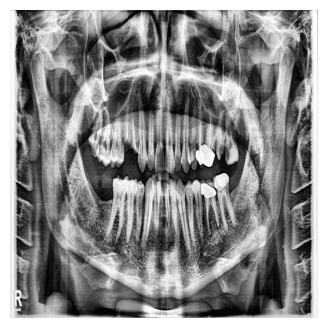

In [ ]:
test_images_path = "/content/drive/MyDrive/Split_dataset/images/test"
img_file=os.listdir(test_images_path)[0]
img_path = os.path.join(test_images_path, img_file)

print(f'Selected Image Path: {img_path}')

img = cv2.imread(img_path)
h, w = img.shape[:2]

plt.figure(figsize=(4,4))
plt.imshow(img,cmap='gray')
plt.axis('off')

CONFIDENCE=0.5

# Predictions
results = model.predict(source=img_path, conf=CONFIDENCE, save=False)
pred_boxes = []
for det in results[0].boxes:
    xyxy = det.xyxy[0].cpu().numpy().astype(int)  # [x1,y1,x2,y2]
    cls = int(det.cls[0].cpu().numpy())
    pred_boxes.append({"class": cls, "bbox": xyxy})

print('List of bounding boxes predicted:')
print(pred_boxes)

## 1. Separate Upper vs Lower

In [ ]:
import numpy as np
import pandas as pd

# Suppose you have predictions in a list of dicts
# Example: [{'class': 11, 'bbox': [x1,y1,x2,y2]}, ...]
predictions = pred_boxes  # from your previous step

# Compute bbox centers
for p in predictions:
    x1, y1, x2, y2 = p['bbox']
    p['x_center'] = (x1 + x2) / 2
    p['y_center'] = (y1 + y2) / 2

# Extract all Y centers
y_centers = np.array([p['y_center'] for p in predictions]).reshape(-1, 1)

# Simple 2-cluster approach: KMeans to separate upper vs lower arch
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(y_centers)
labels = kmeans.labels_  # 0 or 1 for each prediction

# Decide which cluster is upper and which is lower
cluster0_mean = y_centers[labels==0].mean()
cluster1_mean = y_centers[labels==1].mean()

if cluster0_mean < cluster1_mean:
    upper_label = 0
    lower_label = 1
else:
    upper_label = 1
    lower_label = 0

# Assign arch to each prediction
for i, p in enumerate(predictions):
    if labels[i] == upper_label:
        p['arch'] = 'upper'
    else:
        p['arch'] = 'lower'

# Optional: convert to DataFrame
clustering_df = pd.DataFrame(predictions)
print(clustering_df[['class','x_center','y_center','arch']])


    class  x_center  y_center   arch
0      22     446.5     398.0  lower
1       4     332.0     273.5  upper
2      16     349.0     274.5  upper
3       8     222.0     268.0  upper
4      19     292.5     269.0  upper
5      29     460.5     270.0  upper
6      11     222.0     410.5  lower
7      27     251.0     415.0  lower
8      28     175.5     257.0  upper
9       0     274.5     265.0  upper
10     14     269.5     416.5  lower
11     10     416.0     409.5  lower
12     26     389.5     412.5  lower
13      7     310.5     271.5  upper
14     20     197.0     263.5  upper
15      1     365.0     273.0  upper
16     13     375.0     421.0  lower
17      9     407.0     266.5  upper
18      5     324.5     406.5  lower
19      2     360.0     422.0  lower
20     21     436.5     259.5  upper
21     12     259.0     249.5  upper
22     24     244.0     243.5  upper
23     18     309.0     404.5  lower
24      3     287.5     413.5  lower


## Step 2: X-Splitting

In [ ]:
def assign_quadrants(df):
    df['quadrant'] = None
    for arch in ['upper','lower']:
        arch_df = df[df['arch']==arch]
        if arch_df.empty:
            continue
        # compute X-midline of this arch
        x_mid = arch_df['x_center'].median()
        # assign quadrant
        df.loc[(df['arch']==arch) & (df['x_center'] < x_mid), 'quadrant'] = f'{arch}_left'
        df.loc[(df['arch']==arch) & (df['x_center'] >= x_mid), 'quadrant'] = f'{arch}_right'
    return df

clustering_df = assign_quadrants(clustering_df)
print(clustering_df[['class','arch','x_center','quadrant']])


    class   arch  x_center     quadrant
0      22  lower     446.5  lower_right
1       4  upper     332.0  upper_right
2      16  upper     349.0  upper_right
3       8  upper     222.0   upper_left
4      19  upper     292.5   upper_left
5      29  upper     460.5  upper_right
6      11  lower     222.0   lower_left
7      27  lower     251.0   lower_left
8      28  upper     175.5   upper_left
9       0  upper     274.5   upper_left
10     14  lower     269.5   lower_left
11     10  lower     416.0  lower_right
12     26  lower     389.5  lower_right
13      7  upper     310.5  upper_right
14     20  upper     197.0   upper_left
15      1  upper     365.0  upper_right
16     13  lower     375.0  lower_right
17      9  upper     407.0  upper_right
18      5  lower     324.5  lower_right
19      2  lower     360.0  lower_right
20     21  upper     436.5  upper_right
21     12  upper     259.0   upper_left
22     24  upper     244.0   upper_left
23     18  lower     309.0   lower_left


# Step3: Assigning FDI Sequentially

In [ ]:
# Standard FDI numbers per quadrant
fdi_map = {
    'upper_right': list(range(11, 19)),
    'upper_left': list(range(21, 29)),
    'lower_left': list(range(31, 39)),
    'lower_right': list(range(41, 49))
}

# Assign FDI numbers
clustering_df['fdi_number'] = None

for quadrant, fdi_numbers in fdi_map.items():
    # select teeth in this quadrant
    q_df = clustering_df[clustering_df['quadrant'] == quadrant].copy()

    if q_df.empty:
        continue

    # sort by X-axis
    q_df = q_df.sort_values('x_center', ascending=True).reset_index()

    # assign FDI numbers sequentially
    n_teeth = len(q_df)
    assigned_fdi = fdi_numbers[:n_teeth]  # slice if some teeth are missing

    # assign to original dataframe using the index
    clustering_df.loc[q_df['index'], 'fdi_number'] = assigned_fdi

print(clustering_df[['class','arch','quadrant','x_center','fdi_number']])


    class   arch     quadrant  x_center fdi_number
0      22  lower  lower_right     446.5         46
1       4  upper  upper_right     332.0         12
2      16  upper  upper_right     349.0         13
3       8  upper   upper_left     222.0         23
4      19  upper   upper_left     292.5         27
5      29  upper  upper_right     460.5         17
6      11  lower   lower_left     222.0         31
7      27  lower   lower_left     251.0         32
8      28  upper   upper_left     175.5         21
9       0  upper   upper_left     274.5         26
10     14  lower   lower_left     269.5         33
11     10  lower  lower_right     416.0         45
12     26  lower  lower_right     389.5         44
13      7  upper  upper_right     310.5         11
14     20  upper   upper_left     197.0         22
15      1  upper  upper_right     365.0         14
16     13  lower  lower_right     375.0         43
17      9  upper  upper_right     407.0         15
18      5  lower  lower_right  

In [ ]:
fdi_map = {
    'upper_right': list(range(11, 19)),   # right → left
    'upper_left': list(range(21, 29)),    # left → right
    'lower_left': list(range(31, 39)),    # left → right
    'lower_right': list(range(41, 49))    # right → left
}

clustering_df['fdi_number'] = None

for quadrant, fdi_numbers in fdi_map.items():
    q_df = clustering_df[clustering_df['quadrant'] == quadrant].copy()
    if q_df.empty:
        continue

    # Choose sort direction based on quadrant
    if quadrant in ['upper_right', 'lower_right']:
        q_df = q_df.sort_values('x_center', ascending=False).reset_index()
    else:  # upper_left, lower_left
        q_df = q_df.sort_values('x_center', ascending=True).reset_index()

    # Assign FDI numbers
    n_teeth = len(q_df)
    assigned_fdi = fdi_numbers[:n_teeth]
    clustering_df.loc[q_df['index'], 'fdi_number'] = assigned_fdi

print(clustering_df[['class','arch','quadrant','x_center','fdi_number']])


    class   arch     quadrant  x_center fdi_number
0      22  lower  lower_right     446.5         41
1       4  upper  upper_right     332.0         16
2      16  upper  upper_right     349.0         15
3       8  upper   upper_left     222.0         23
4      19  upper   upper_left     292.5         27
5      29  upper  upper_right     460.5         11
6      11  lower   lower_left     222.0         31
7      27  lower   lower_left     251.0         32
8      28  upper   upper_left     175.5         21
9       0  upper   upper_left     274.5         26
10     14  lower   lower_left     269.5         33
11     10  lower  lower_right     416.0         42
12     26  lower  lower_right     389.5         43
13      7  upper  upper_right     310.5         17
14     20  upper   upper_left     197.0         22
15      1  upper  upper_right     365.0         14
16     13  lower  lower_right     375.0         44
17      9  upper  upper_right     407.0         13
18      5  lower  lower_right  